In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

In [2]:
to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
data = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1 )

In [4]:
data.describe()

,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
count,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07,1.102711e+07
mean,8.106457e-03,4.347531e+00,1.109025e+02,8.149364e-03,5.182957e+00,1.110816e+02,7.077341e-03,2.981141e+00,8.625382e+01,4.530418e-02
std,5.411981e-03,2.577925e+00,1.192639e+01,5.301427e-03,3.008630e+00,1.302800e+01,4.385762e-03,1.699636e+00,5.556484e+00,2.079705e-01
min,1.660000e-03,9.400000e-02,7.320000e+01,1.660000e-03,4.400000e-02,7.540000e+01,1.660000e-03,1.360000e-01,6.100000e+01,0.000000e+00
25%,4.320000e-03,2.500000e+00,1.040000e+02,4.490000e-03,2.930000e+00,9.870000e+01,4.090000e-03,1.930000e+00,8.200000e+01,0.000000e+00
50%,6.640000e-03,3.550000e+00,1.110000e+02,6.690000e-03,4.230000e+00,1.120000e+02,5.980000e-03,2.510000e+00,8.640000e+01,0.000000e+00
75%,1.020000e-02,5.570000e+00,1.200000e+02,1.030000e-02,6.890000e+00,1.230000e+02,8.630000e-03,3.470000e+00,9.040000e+01,0.000000e+00
max,1.200000e-01,2.060000e+02,1.530000e+02,1.380000e-01,2.060000e+02,1.560000e+02,1.030000e-01,1.840000e+02,1.430000e+02,1.000000e+00


In [5]:
data.columns

Index(['-1_flank_length', '-1_flank_std', '-1_flank_mean', 'central_length',
       'central_std', 'central_mean', '+1_flank_length', '+1_flank_std',
       '+1_flank_mean', 'label'],
      dtype='object')

**Correlation-Based Feature Selection** 

In [8]:
correlation_matrix = data.corr()

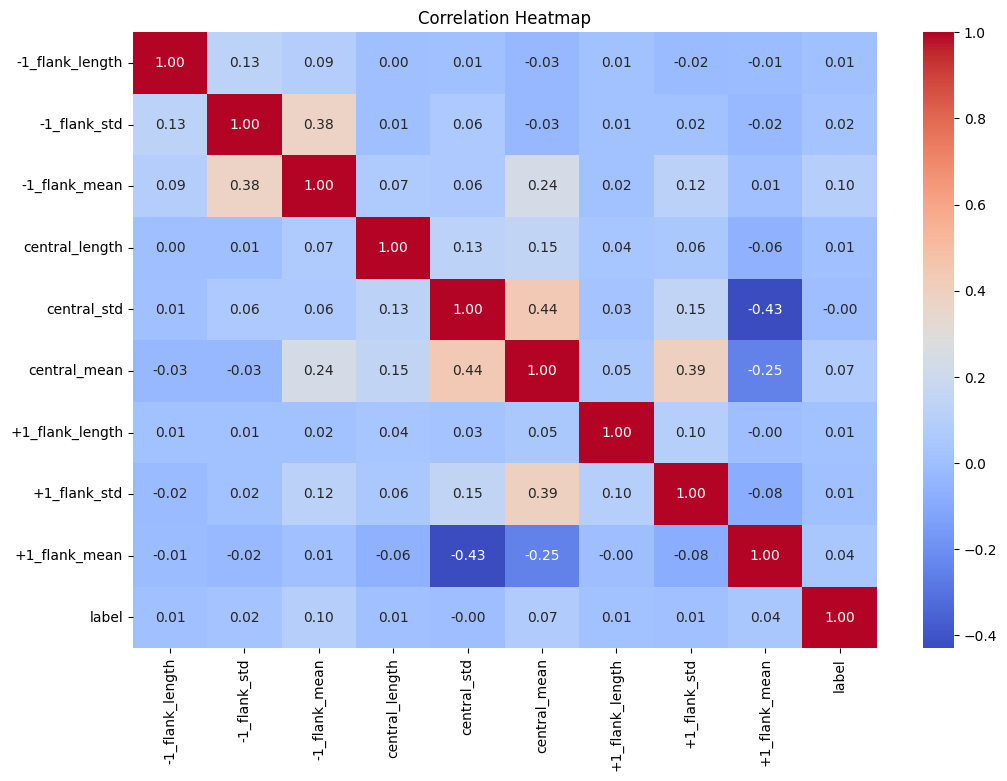

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Recursive Feature Elimination (RFE)**

In [15]:
X = data.drop('label', axis=1)
y = data['label']
clf = LogisticRegression()

rfe = RFE(clf, n_features_to_select=5)

rfe.fit(X, y)
selected_features = [f for f, s in zip(X.columns, rfe.support_) if s]

In [16]:
print(selected_features)

['-1_flank_length', '-1_flank_mean', 'central_length', '+1_flank_std', '+1_flank_mean']


**L1 regularization (Lasso)**

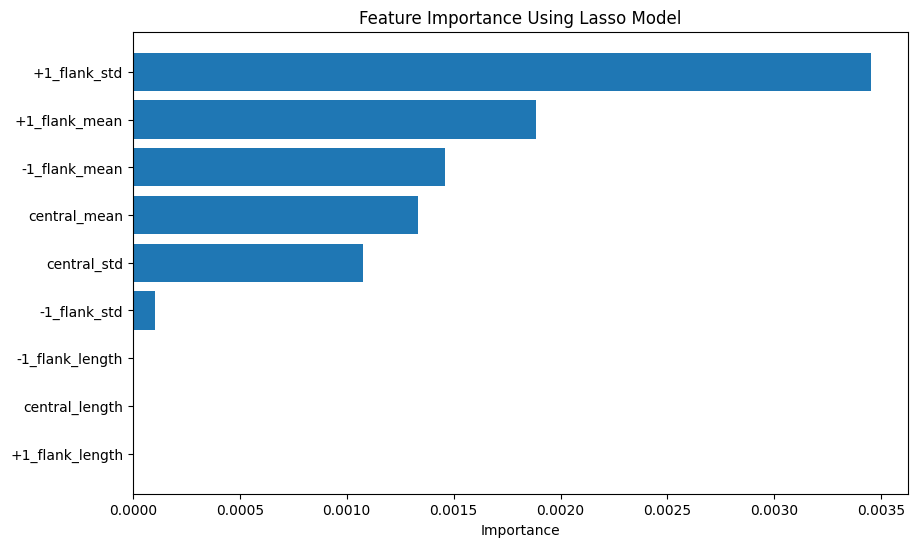

In [19]:
lasso_model = LassoCV(cv=5)  # 5-fold cross-validation
lasso_model.fit(X, y)
feature_importance = np.abs(lasso_model.coef_)

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Using Lasso Model')
plt.gca().invert_yaxis()  
plt.show()
